In [3]:
import dx
import datetime as dt
import pandas as pd
from pylab import plt
plt.style.use('seaborn')

In [6]:
r = dx.constant_short_rate('r', 0.01)
me_1 = dx.market_environment('me', dt.datetime(2016, 1, 1))

In [7]:
me_1.add_constant('initial_value', 100.)
  # starting value of simulated processes
me_1.add_constant('volatility', 0.2)
  # volatiltiy factor
me_1.add_constant('final_date', dt.datetime(2017, 6, 30))
  # horizon for simulation
me_1.add_constant('currency', 'EUR')
  # currency of instrument
me_1.add_constant('frequency', 'W')
  # frequency for discretization
me_1.add_constant('paths', 10000)
  # number of paths
me_1.add_curve('discount_curve', r)
  # number of paths

In [8]:
gbm_1 = dx.geometric_brownian_motion('gbm_1', me_1)

In [9]:
pdf = pd.DataFrame(gbm_1.get_instrument_values(), index=gbm_1.time_grid)

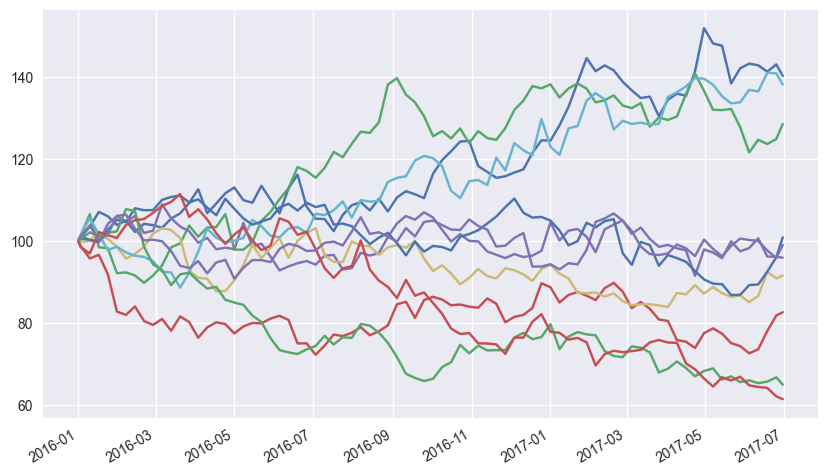

In [10]:
%matplotlib inline
pdf.iloc[:, :10].plot(legend=False, figsize=(10, 6));

In [11]:
me_2 = dx.market_environment('me_2', me_1.pricing_date)
me_2.add_environment(me_1)  # add complete environment
me_2.add_constant('volatility', 0.5)  # overwrite value

In [12]:
gbm_2 = dx.geometric_brownian_motion('gbm_2', me_2)

In [13]:
pdf = pd.DataFrame(gbm_2.get_instrument_values(), index=gbm_2.time_grid)

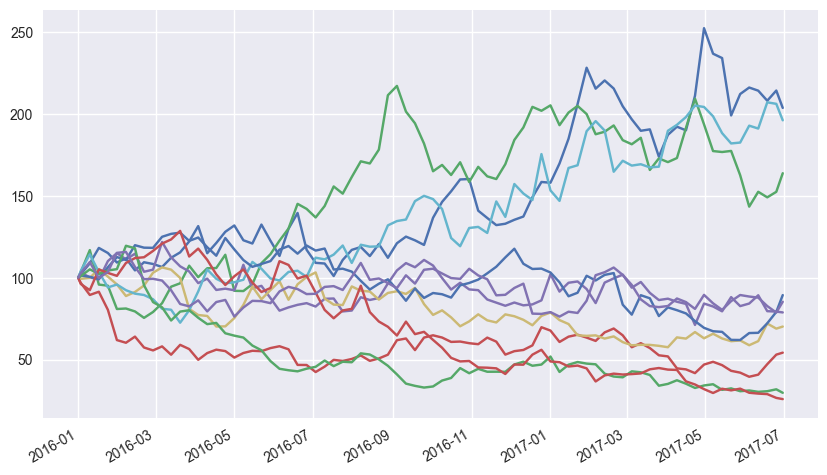

In [14]:
pdf.iloc[:, :10].plot(legend=False, figsize=(10, 6));